In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload() #upload kaggle json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdeabitalibmerchant","key":"bd768d1e4e49c11ac56e018ec0ab276f"}'}

In [3]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !your dataset api command
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:40<00:00, 22.7MB/s]
100% 812M/812M [00:40<00:00, 21.1MB/s]


In [5]:

# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/dogs-vs-cats.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipObj:
    # printing all the contents of the zip file
    zipObj.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zipObj.extractall()
    print('Done!')

File Name                                             Modified             Size
sampleSubmission.csv                           2019-12-11 04:17:58        88903
test1.zip                                      2019-12-11 04:18:02    284321224
train.zip                                      2019-12-11 04:18:34    569546721
Extracting all the files now...
Done!


In [6]:

# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/train.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipObj:
    # printing all the contents of the zip file
    zipObj.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zipObj.extractall('/content/input/DogvCat/train')
    print('Done!')

Streaming output truncated to the last 5000 lines.
train/dog.550.jpg                              2013-09-20 10:02:54         4826
train/dog.5500.jpg                             2013-09-20 10:02:54        44699
train/dog.5501.jpg                             2013-09-20 10:02:54        30379
train/dog.5502.jpg                             2013-09-20 10:02:54        25140
train/dog.5503.jpg                             2013-09-20 10:02:54        21938
train/dog.5504.jpg                             2013-09-20 10:02:54         7717
train/dog.5505.jpg                             2013-09-20 10:02:54        26625
train/dog.5506.jpg                             2013-09-20 10:02:54         8554
train/dog.5507.jpg                             2013-09-20 10:02:54        19899
train/dog.5508.jpg                             2013-09-20 10:02:54         9154
train/dog.5509.jpg                             2013-09-20 10:02:54        25600
train/dog.551.jpg                              2013-09-20 10:02:54   

In [7]:

# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "/content/test1.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zipObj:
    # printing all the contents of the zip file
    zipObj.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zipObj.extractall('/content/input/DogvCat/test1')
    print('Done!')

Streaming output truncated to the last 5000 lines.
test1/550.jpg                                  2013-09-20 10:12:40        11253
test1/5500.jpg                                 2013-09-20 10:15:26        19488
test1/5501.jpg                                 2013-09-20 10:15:26        14965
test1/5502.jpg                                 2013-09-20 10:15:26        14406
test1/5503.jpg                                 2013-09-20 10:15:26        14957
test1/5504.jpg                                 2013-09-20 10:15:26        15065
test1/5505.jpg                                 2013-09-20 10:15:26         2985
test1/5506.jpg                                 2013-09-20 10:15:26         4349
test1/5507.jpg                                 2013-09-20 10:15:26        27502
test1/5508.jpg                                 2013-09-20 10:15:26        54253
test1/5509.jpg                                 2013-09-20 10:15:26         2312
test1/551.jpg                                  2013-09-20 10:12:40   

In [8]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("/content/input"))


['DogvCat']


# Define Constants

In [9]:
FAST_RUN = True
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [10]:
filenames = os.listdir("/content/input/DogvCat/train/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [11]:
df.head()

,filename,category
0,dog.2413.jpg,1
1,dog.2065.jpg,1
2,dog.2702.jpg,1
3,cat.6398.jpg,0
4,dog.5587.jpg,1


In [12]:
df.tail()

,filename,category
24995,cat.11632.jpg,0
24996,cat.10186.jpg,0
24997,dog.6863.jpg,1
24998,cat.8221.jpg,0
24999,cat.11397.jpg,0


# See sample image

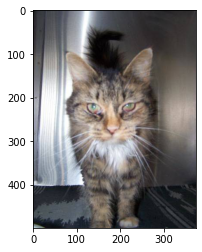

In [13]:
sample = random.choice(filenames)
image = load_img("/content/input/DogvCat/train/train/"+sample)
plt.imshow(image)

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

# Callbacks

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [16]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [17]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [18]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [19]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [20]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

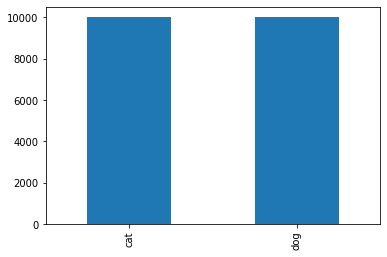

In [21]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

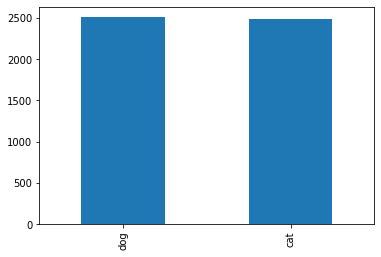

In [22]:
validate_df['category'].value_counts().plot.bar()

In [23]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Traning Generator

In [24]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/input/DogvCat/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [25]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/input/DogvCat/train/train", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


# See how our generator work

In [26]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/input/DogvCat/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


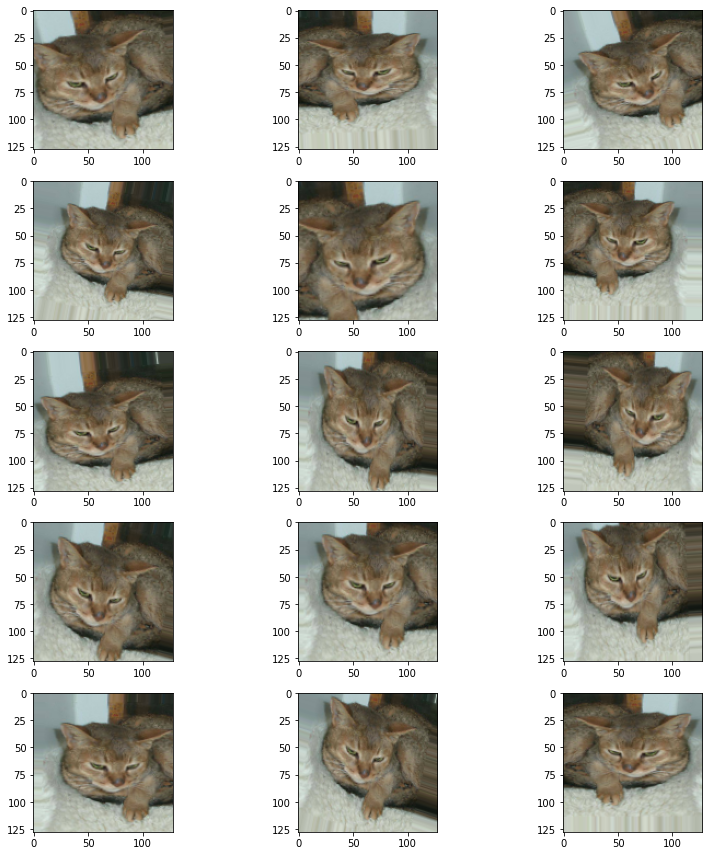

In [27]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()


# Fit Model

In [28]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-28-63cb34b6e89a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/3
1333/1333 [==============================] - ETA: 0s - loss: 0.7459 - accuracy: 0.6329

1333/1333 [==============================] - 174s 121ms/step - loss: 0.7459 - accuracy: 0.6329 - val_loss: 0.5299 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 2/3
1333/1333 [==============================] - ETA: 0s - loss: 0.5680 - accuracy: 0.7141

1333/1333 [==============================] - 156s 117ms/step - loss: 0.5680 - accuracy: 0.7141 - val_loss: 0.4868 - val_accuracy: 0.7656 - lr: 0.0010
Epoch 3/3
1333/1333 [==============================] - ETA: 0s - loss: 0.5108 - accuracy: 0.7565

1333/1333 [==============================] - 148s 111ms/step - loss: 0.5108 - accuracy: 0.7565 - val_loss: 1.1176 - val_accuracy: 0.6012 - lr: 0.0010


# Save Model

In [29]:
model.save_weights("model.h5")

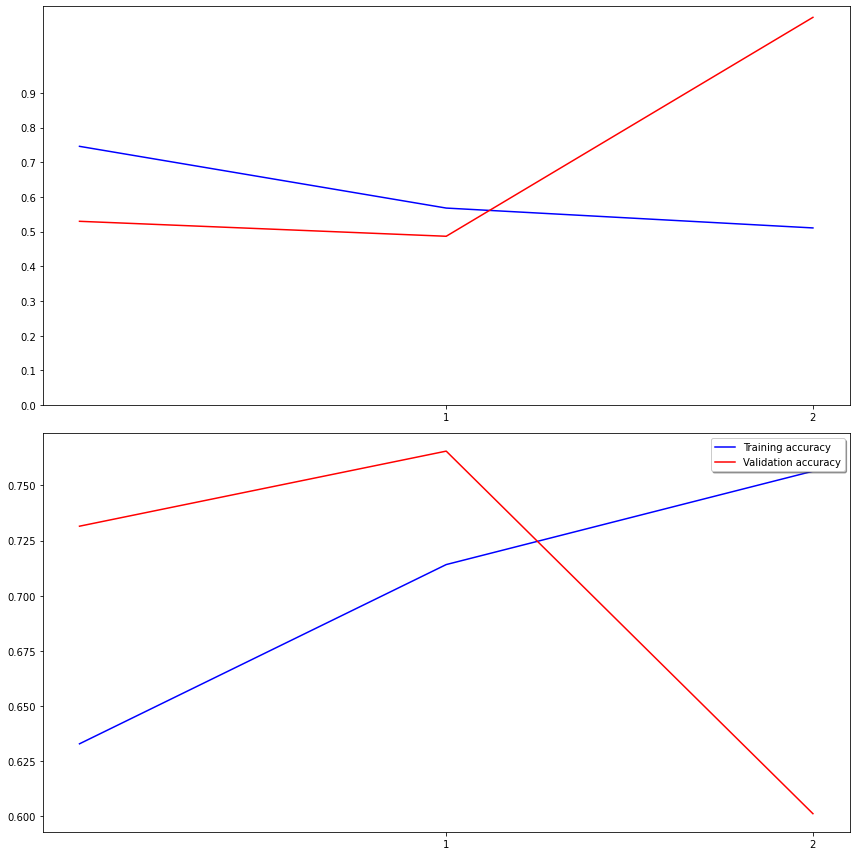

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [34]:
test_filenames = os.listdir("/content/input/DogvCat/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [35]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/input/DogvCat/test1/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# Predict

In [36]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-36-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [37]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [38]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [39]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Virtaulize Result

<AxesSubplot:>

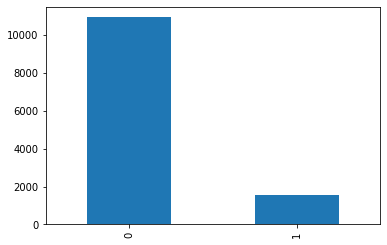

In [40]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

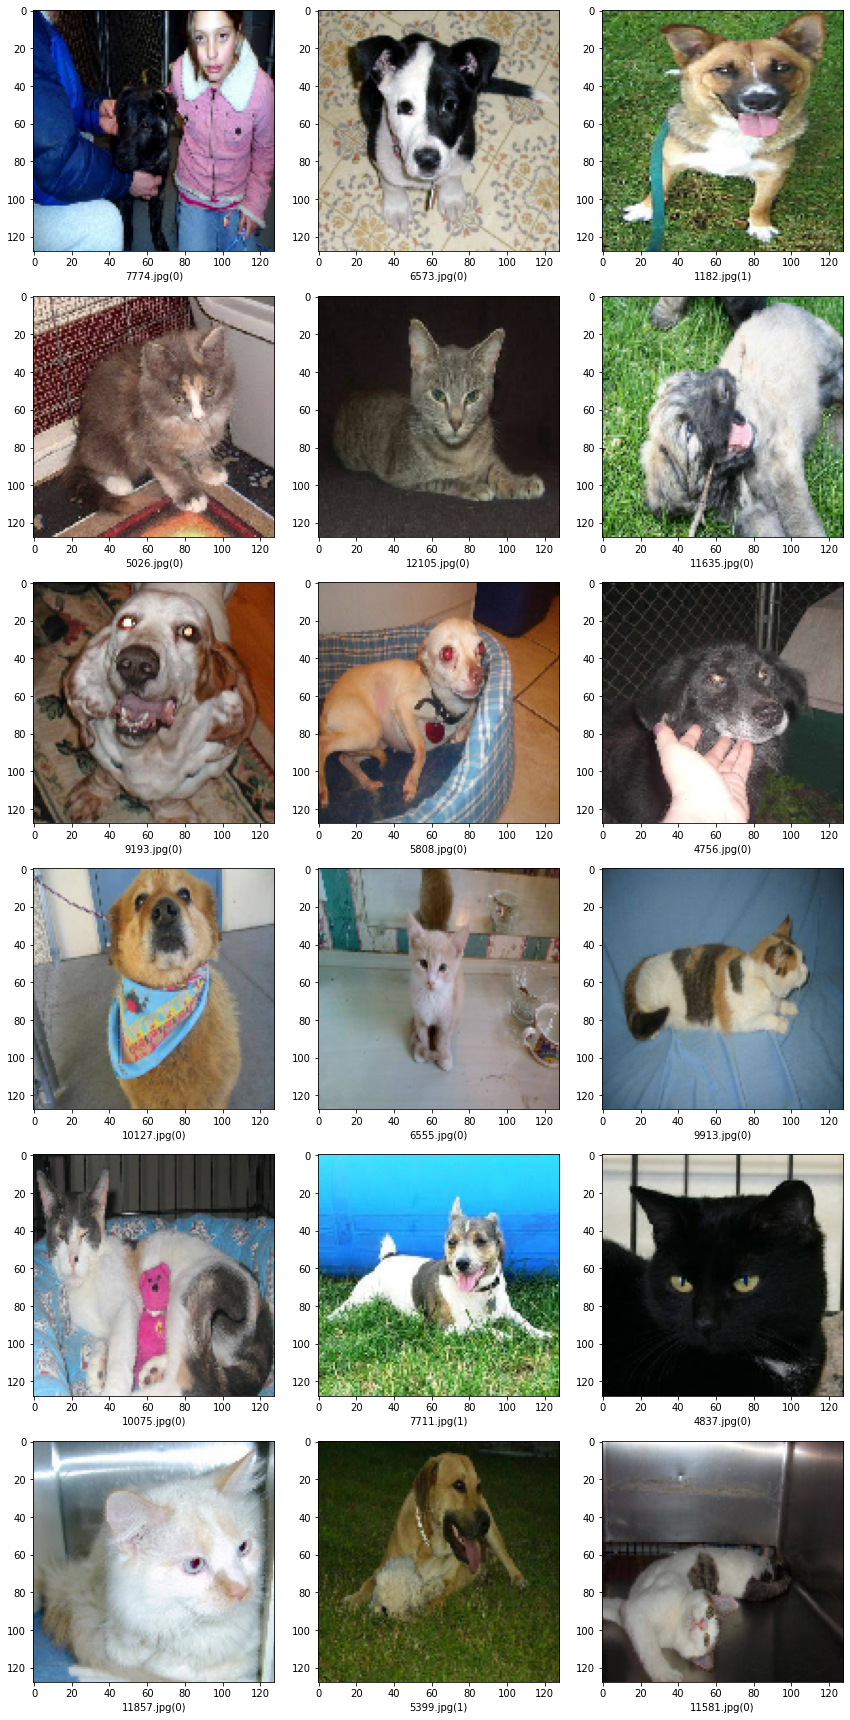

In [43]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/input/DogvCat/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()